DATA PREPROCESSING

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Cardiovascular_Disease_Dataset.csv")

In [3]:
print(df.head(10))

   patientid  age  gender  chestpain  restingBP  serumcholestrol  \
0     103368   53       1          2        171                0   
1     119250   40       1          0         94              229   
2     119372   49       1          2        133              142   
3     132514   43       1          0        138              295   
4     146211   31       1          1        199                0   
5     148462   24       1          1        173                0   
6     168686   79       1          2        130              240   
7     170498   52       1          0        127              345   
8     188225   62       1          0        121              357   
9     192523   61       0          0        190              181   

   fastingbloodsugar  restingrelectro  maxheartrate  exerciseangia  oldpeak  \
0                  0                1           147              0      5.3   
1                  0                1           115              0      3.7   
2             

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   patientid          1000 non-null   int64  
 1   age                1000 non-null   int64  
 2   gender             1000 non-null   int64  
 3   chestpain          1000 non-null   int64  
 4   restingBP          1000 non-null   int64  
 5   serumcholestrol    1000 non-null   int64  
 6   fastingbloodsugar  1000 non-null   int64  
 7   restingrelectro    1000 non-null   int64  
 8   maxheartrate       1000 non-null   int64  
 9   exerciseangia      1000 non-null   int64  
 10  oldpeak            1000 non-null   float64
 11  slope              1000 non-null   int64  
 12  noofmajorvessels   1000 non-null   int64  
 13  target             1000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 109.5 KB


In [5]:
df.isnull().any()

patientid            False
age                  False
gender               False
chestpain            False
restingBP            False
serumcholestrol      False
fastingbloodsugar    False
restingrelectro      False
maxheartrate         False
exerciseangia        False
oldpeak              False
slope                False
noofmajorvessels     False
target               False
dtype: bool

Removing Duplicate if any

In [6]:
df.shape

(1000, 14)

In [7]:
df = df.drop_duplicates()
df.shape

(1000, 14)

In [8]:
duplicates = df.duplicated(subset='patientid', keep=False)
duplicate_rows = df[duplicates]

if duplicate_rows.empty:
    print("All patient IDs are unique.")
else:
    print("There are duplicate patient IDs in the dataset.")
    print(duplicate_rows)

All patient IDs are unique.


Dropping Patientid column

In [9]:
df = df.drop(columns="patientid")

In [10]:
df.columns

Index(['age', 'gender', 'chestpain', 'restingBP', 'serumcholestrol',
       'fastingbloodsugar', 'restingrelectro', 'maxheartrate', 'exerciseangia',
       'oldpeak', 'slope', 'noofmajorvessels', 'target'],
      dtype='object')

In [11]:
df = df.drop_duplicates()
df.shape

(1000, 13)

EDA

In [12]:
df.describe()

,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.24200,0.765000,0.980000,151.747000,311.447000,0.296000,0.748000,145.477000,0.498000,2.707700,1.540000,1.222000,0.580000
std,17.86473,0.424211,0.953157,29.965228,132.443801,0.456719,0.770123,34.190268,0.500246,1.720753,1.003697,0.977585,0.493805
min,20.00000,0.000000,0.000000,94.000000,0.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34.00000,1.000000,0.000000,129.000000,235.750000,0.000000,0.000000,119.750000,0.000000,1.300000,1.000000,0.000000,0.000000
50%,49.00000,1.000000,1.000000,147.000000,318.000000,0.000000,1.000000,146.000000,0.000000,2.400000,2.000000,1.000000,1.000000
75%,64.25000,1.000000,2.000000,181.000000,404.250000,1.000000,1.000000,175.000000,1.000000,4.100000,2.000000,2.000000,1.000000
max,80.00000,1.000000,3.000000,200.000000,602.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,1.000000


In [13]:
df.columns

Index(['age', 'gender', 'chestpain', 'restingBP', 'serumcholestrol',
       'fastingbloodsugar', 'restingrelectro', 'maxheartrate', 'exerciseangia',
       'oldpeak', 'slope', 'noofmajorvessels', 'target'],
      dtype='object')

<Axes: >

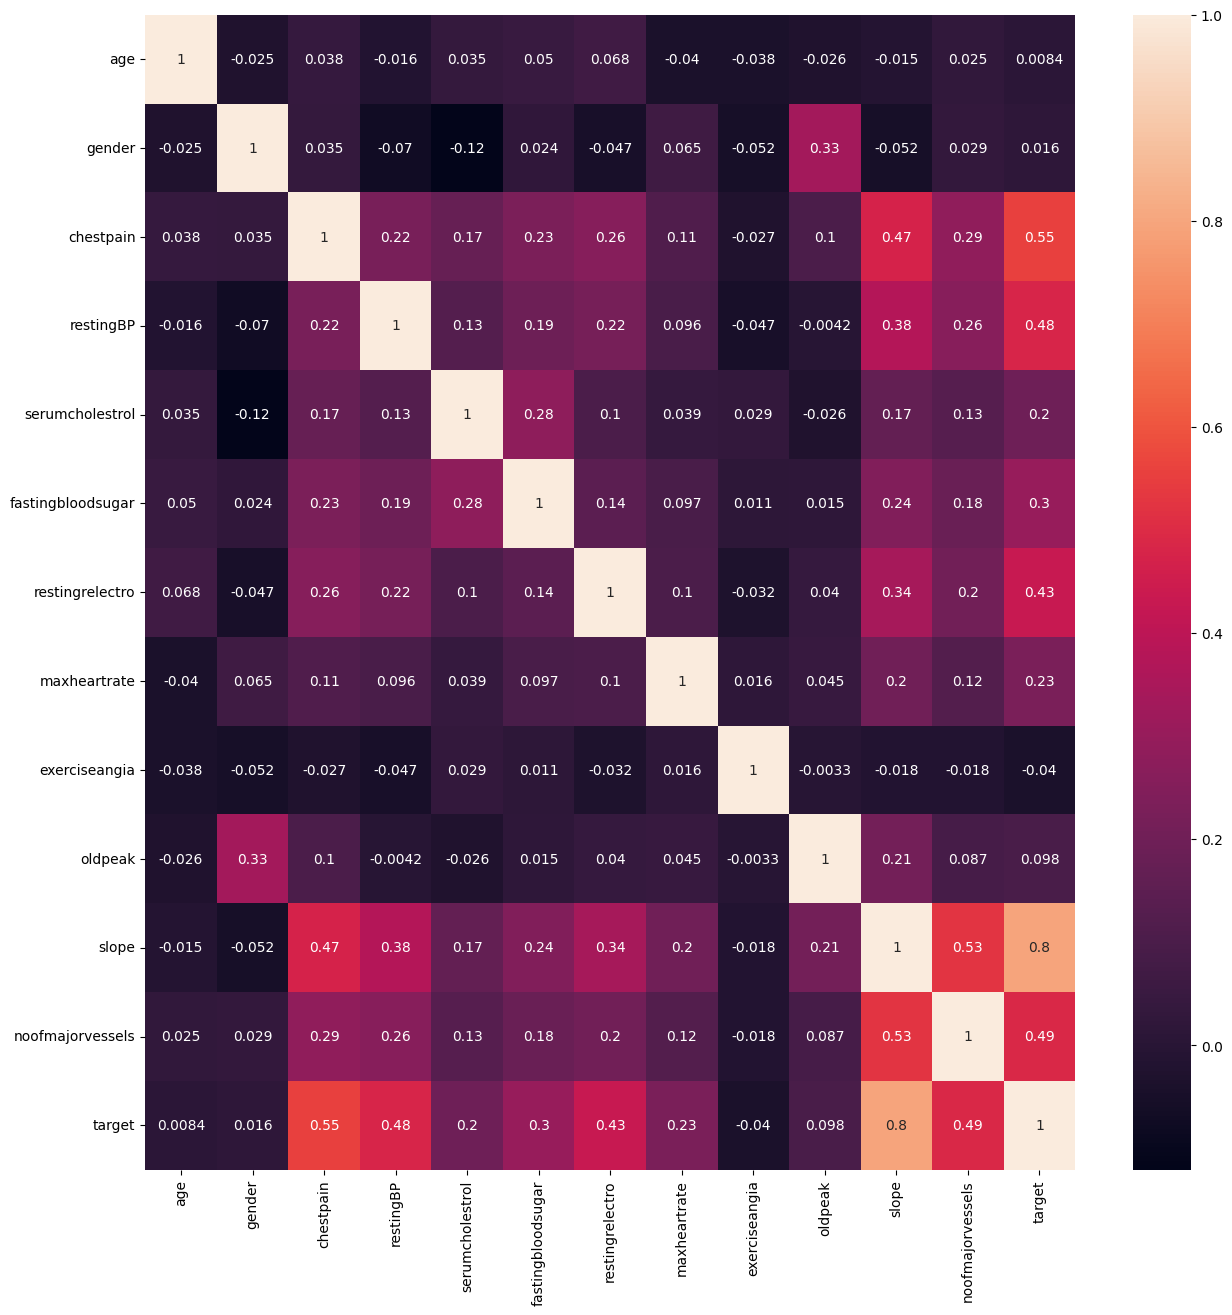

In [14]:
correlation = df.corr()
plt.figure(figsize = (15,15))
sns.heatmap(correlation,annot=True)

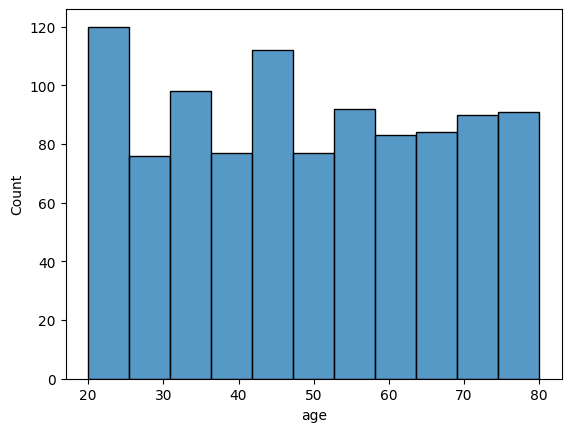

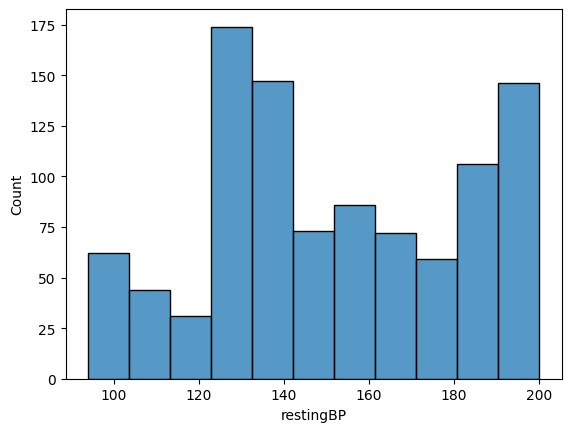

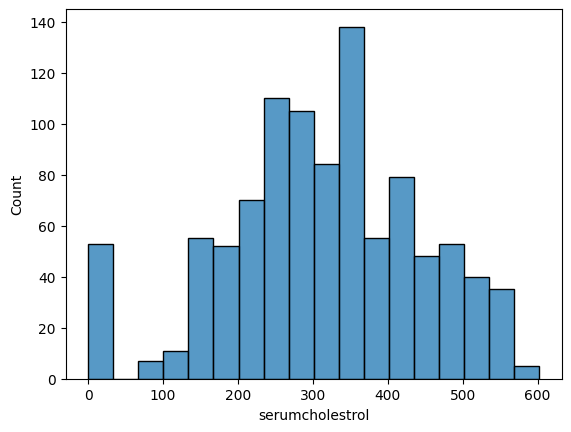

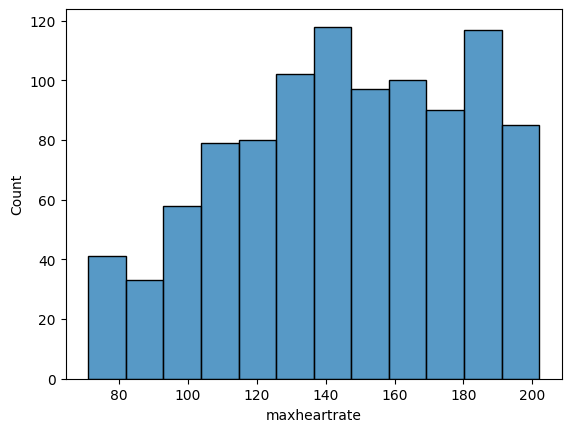

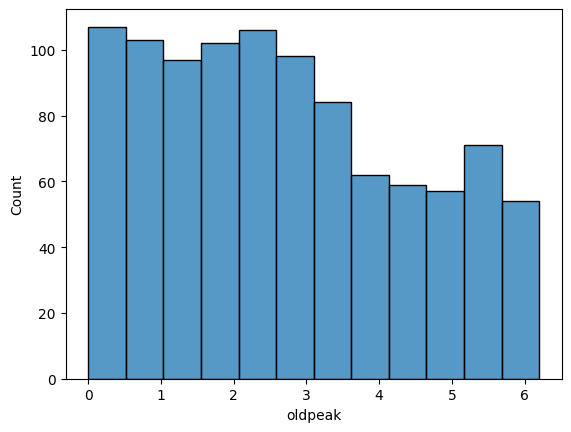

In [15]:
for i in ["age", "restingBP", "serumcholestrol", "maxheartrate","oldpeak"]:
    sns.histplot(data=df, x=df[i])
    plt.show()


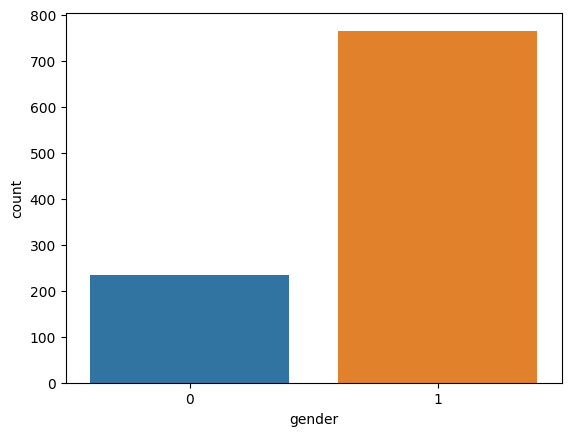

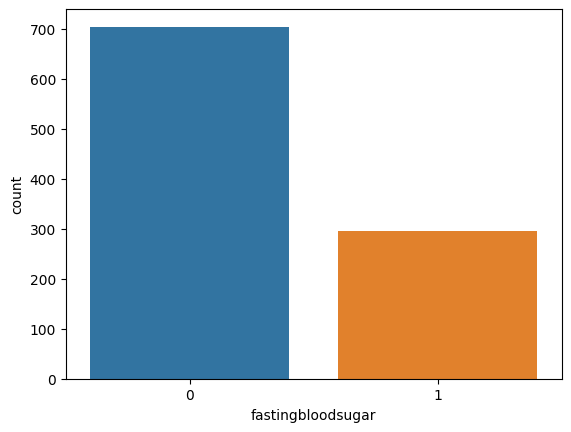

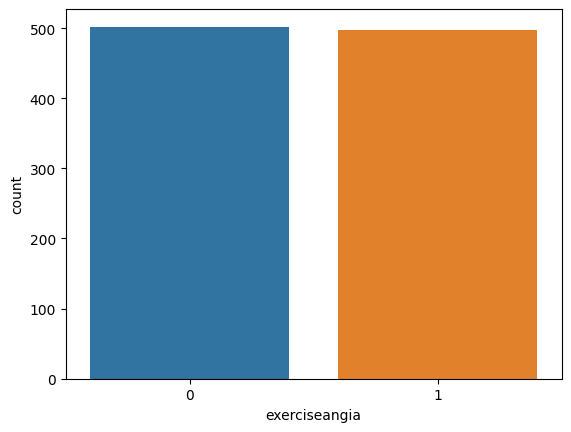

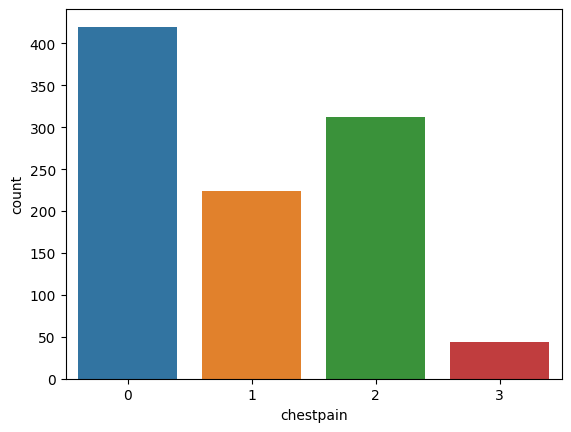

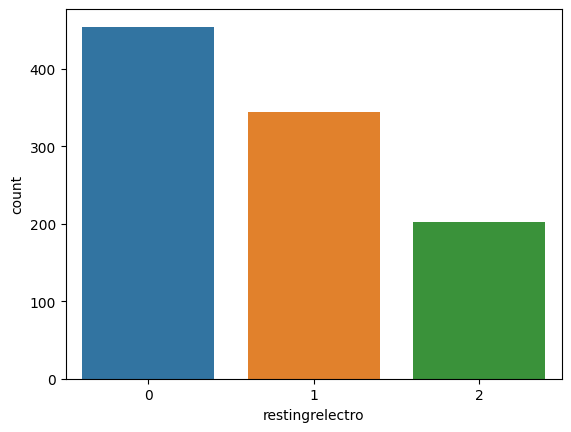

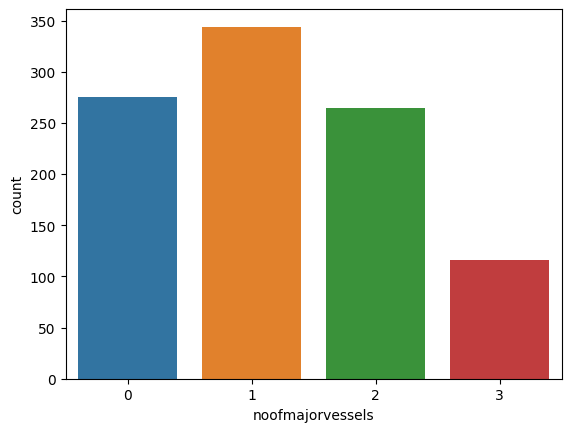

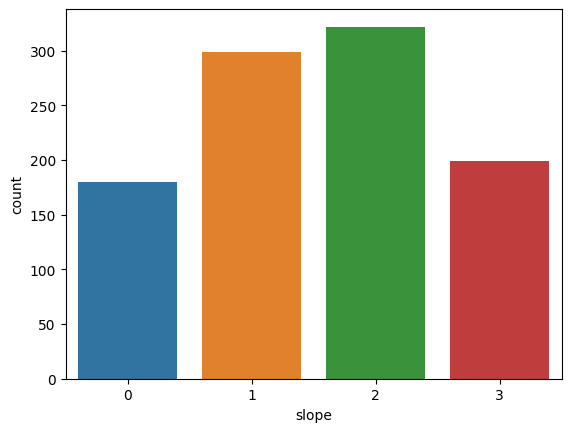

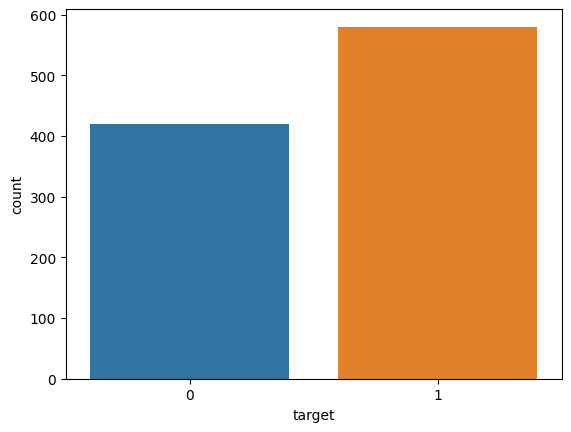

In [16]:
#for binary values
for i in ["gender",'fastingbloodsugar',"exerciseangia","chestpain", "restingrelectro", "noofmajorvessels","slope","target"]:
    sns.countplot(x=df[i], data=df)
    plt.show()

In [17]:
df.columns

Index(['age', 'gender', 'chestpain', 'restingBP', 'serumcholestrol',
       'fastingbloodsugar', 'restingrelectro', 'maxheartrate', 'exerciseangia',
       'oldpeak', 'slope', 'noofmajorvessels', 'target'],
      dtype='object')

Removing Noises

Outliers

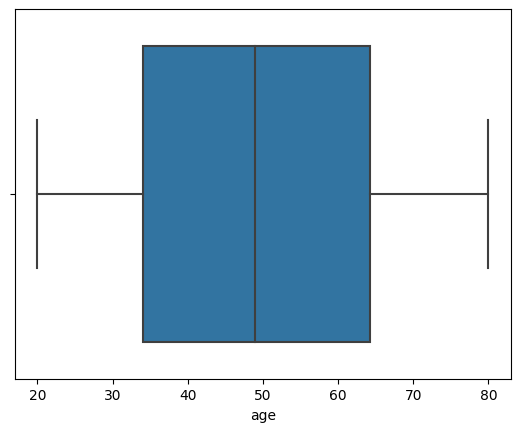

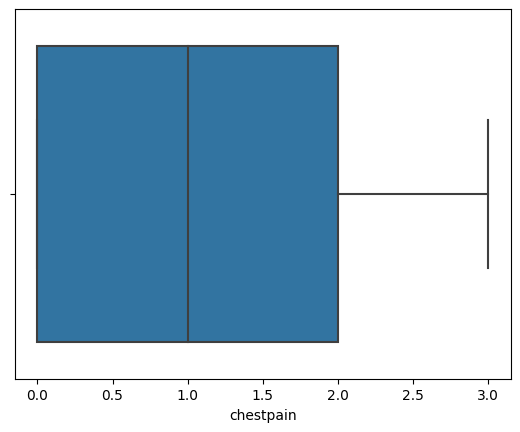

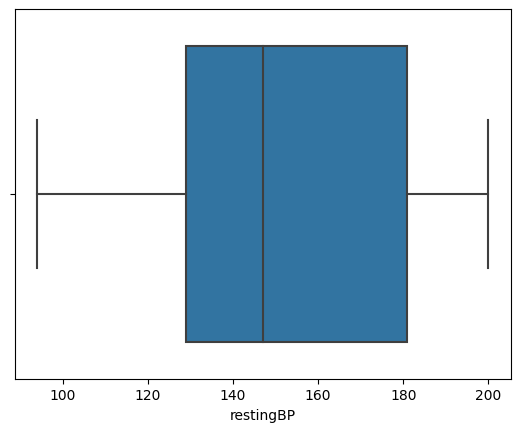

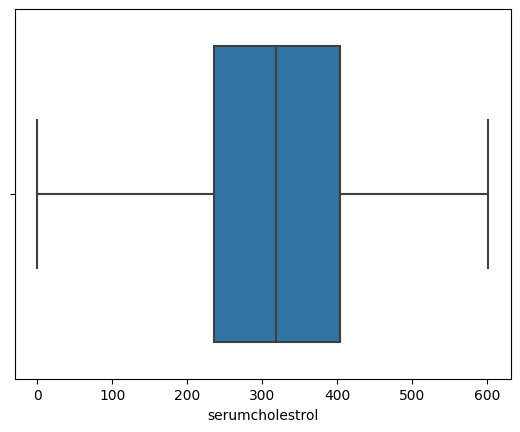

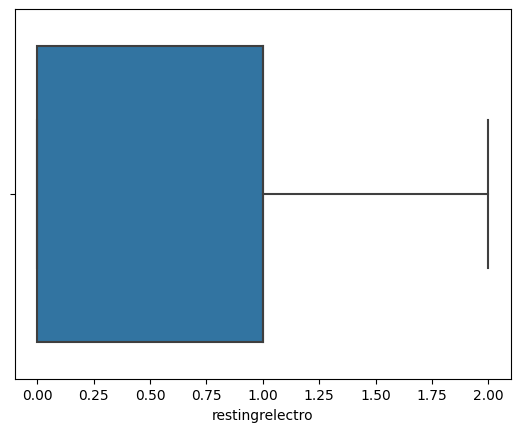

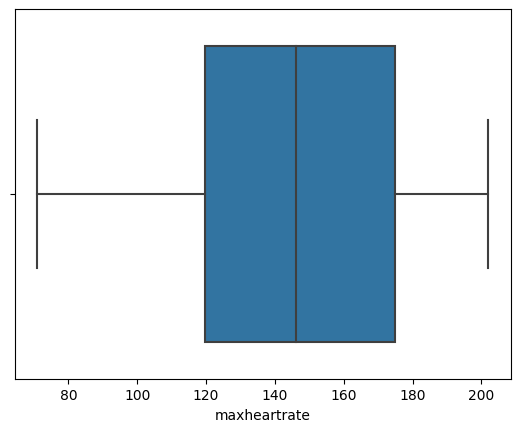

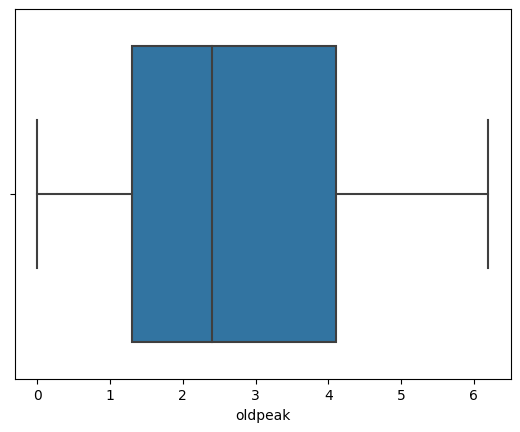

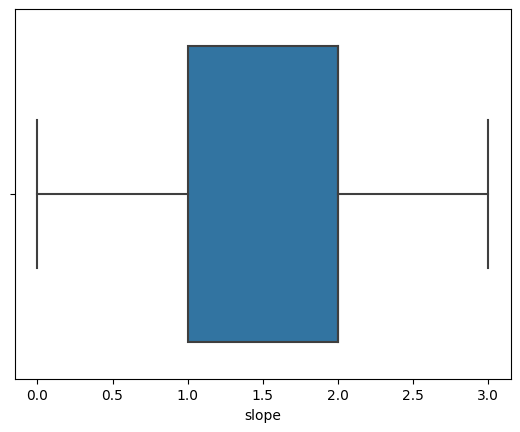

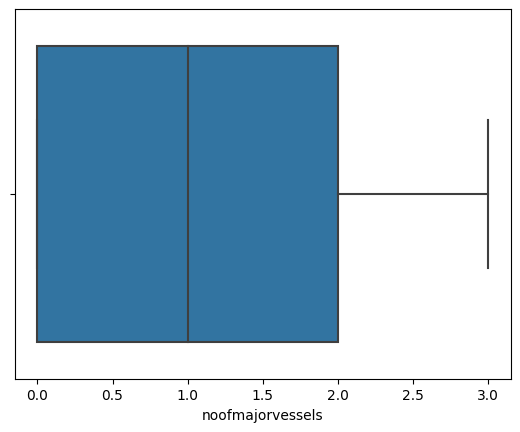

In [18]:
for i in ["age" ,"chestpain" ,"restingBP" ,"serumcholestrol","restingrelectro","maxheartrate","oldpeak","slope","noofmajorvessels"]:
    sns.boxplot(data = df,x = df[i])
    plt.show()

In [19]:
# Serum cholestrol can only have values ranging for 126 - 564 but some 0 values are present
# SINCE NO outliers present it can considered as noise and is df1 is used to make changes

zero_cholestrol_rows = df[df['serumcholestrol'] == 0]

zero_cholestrol_indexes = zero_cholestrol_rows.index

print("Rows count with serumcholestrol value of 0:")
print(zero_cholestrol_rows.shape[0])



Rows count with serumcholestrol value of 0:
53


In [20]:
zero_cholestrol_rows = df[df['serumcholestrol'] > 564]

zero_cholestrol_indexes = zero_cholestrol_rows.index

print("Rows count with serumcholestrol value greater than 564:")
print(zero_cholestrol_rows.shape[0])

Rows count with serumcholestrol value greater than 564:
5


In [21]:
# since the row count with serumcholestrol value greater than 564 is 5 , we can ignore it
df1 = df.copy()
df1['serumcholestrol'].replace(0, np.nan, inplace=True)

In [22]:
df1.isnull().sum()

age                   0
gender                0
chestpain             0
restingBP             0
serumcholestrol      53
fastingbloodsugar     0
restingrelectro       0
maxheartrate          0
exerciseangia         0
oldpeak               0
slope                 0
noofmajorvessels      0
target                0
dtype: int64

Handling Missing Data

In [23]:
# for knn imputation we are gonna use df1
from sklearn.impute import KNNImputer

imputer = KNNImputer()

df1 = imputer.fit_transform(df1)

df1 = pd.DataFrame(df1, columns=df.columns)


In [24]:
df1.isnull().sum()

age                  0
gender               0
chestpain            0
restingBP            0
serumcholestrol      0
fastingbloodsugar    0
restingrelectro      0
maxheartrate         0
exerciseangia        0
oldpeak              0
slope                0
noofmajorvessels     0
target               0
dtype: int64

In [25]:
x = df.corr()

In [26]:
target_column = "target"
sorted_corr = x[target_column].sort_values(ascending=False)
sorted_corr

target               1.000000
slope                0.797358
chestpain            0.554228
noofmajorvessels     0.489866
restingBP            0.482387
restingrelectro      0.426837
fastingbloodsugar    0.303233
maxheartrate         0.228343
serumcholestrol      0.195340
oldpeak              0.098053
gender               0.015769
age                  0.008356
exerciseangia       -0.039874
Name: target, dtype: float64

In [27]:
x= df1.corr()

In [28]:
target_column = "target"
sorted_corr = x[target_column].sort_values(ascending=False)
sorted_corr

target               1.000000
slope                0.797358
chestpain            0.554228
noofmajorvessels     0.489866
restingBP            0.482387
restingrelectro      0.426837
serumcholestrol      0.374824
fastingbloodsugar    0.303233
maxheartrate         0.228343
oldpeak              0.098053
gender               0.015769
age                  0.008356
exerciseangia       -0.039874
Name: target, dtype: float64

In [ ]:
# from this we can see that the exerciseangia has the lowest correlation with heart diesease


In [30]:
df = df.drop(columns="exerciseangia")
df1 = df1.drop(columns="exerciseangia")

In [31]:
print(df.columns)
print(df.shape)


Index(['age', 'gender', 'chestpain', 'restingBP', 'serumcholestrol',
       'fastingbloodsugar', 'restingrelectro', 'maxheartrate', 'oldpeak',
       'slope', 'noofmajorvessels', 'target'],
      dtype='object')
(1000, 12)


In [32]:
print(df1.columns)
print(df1.shape)

Index(['age', 'gender', 'chestpain', 'restingBP', 'serumcholestrol',
       'fastingbloodsugar', 'restingrelectro', 'maxheartrate', 'oldpeak',
       'slope', 'noofmajorvessels', 'target'],
      dtype='object')
(1000, 12)


# KNN

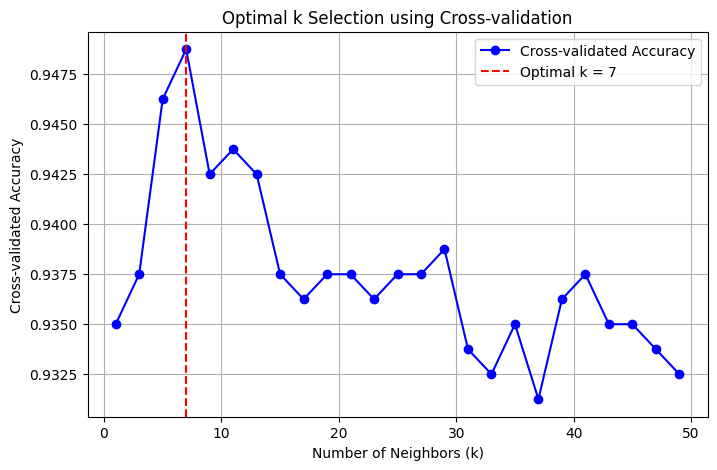

Optimal k for df: 7
AUC-PR for df: 0.9965
Accuracy for df: 0.9650
Classification Report for df:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96        83
           1       0.97      0.97      0.97       117

    accuracy                           0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.97      0.96      0.97       200

Confusion Matrix for df:
[[ 80   3]
 [  4 113]]


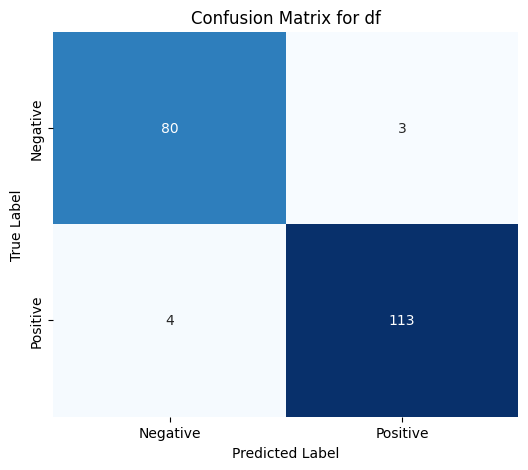

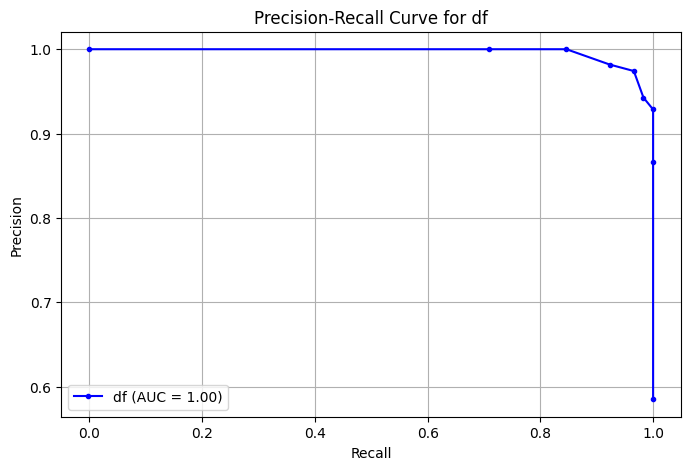

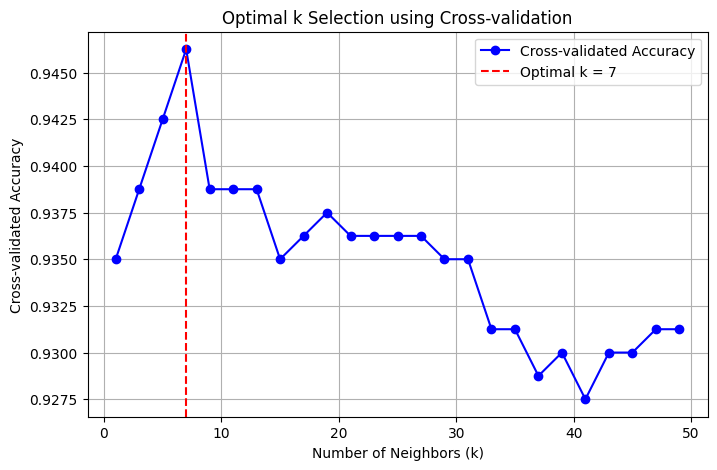

Optimal k for df1: 7
AUC-PR for df1: 0.9947
Accuracy for df1: 0.9650
Classification Report for df1:
              precision    recall  f1-score   support

         0.0       0.95      0.96      0.96        83
         1.0       0.97      0.97      0.97       117

    accuracy                           0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.97      0.96      0.97       200

Confusion Matrix for df1:
[[ 80   3]
 [  4 113]]


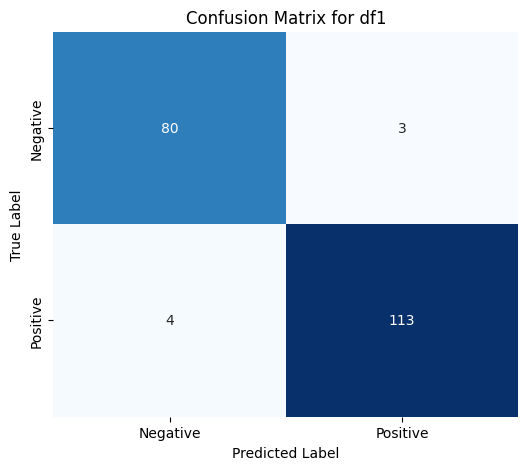

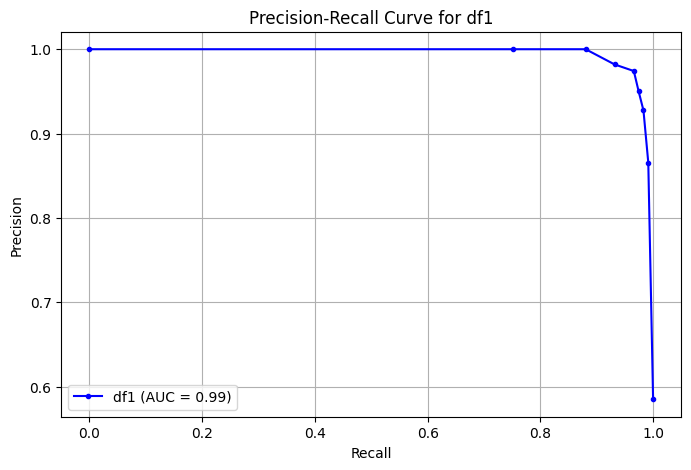

Combined PR curve image saved at pr_curves\combined_pr_curves.png


In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_recall_curve, auc, accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from PIL import Image, ImageDraw, ImageFont

# Function to find the optimal k value using cross-validation
def find_optimal_k(X_train, y_train, max_k=50):
    k_values = range(1, max_k, 2)  # Odd values of k to avoid ties
    mean_accuracies = []

    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
        mean_accuracies.append(scores.mean())

    optimal_k = k_values[np.argmax(mean_accuracies)]
    
    # Plot k vs accuracy
    plt.figure(figsize=(8, 5))
    plt.plot(k_values, mean_accuracies, marker='o', linestyle='-', color='b', label='Cross-validated Accuracy')
    plt.axvline(optimal_k, color='r', linestyle='--', label=f'Optimal k = {optimal_k}')
    plt.xlabel('Number of Neighbors (k)')
    plt.ylabel('Cross-validated Accuracy')
    plt.title('Optimal k Selection using Cross-validation')
    plt.legend()
    plt.grid(True)
    plt.show()

    return optimal_k

# Create a directory to save PR curve images
output_dir = "pr_curves"
os.makedirs(output_dir, exist_ok=True)

# Store image paths for final combination
pr_curve_images = []
k_values = []

def knn_pr_curve_and_report(X, y, dataset_label):
    global pr_curve_images, k_values
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    optimal_k = find_optimal_k(X_train_scaled, y_train)
    knn = KNeighborsClassifier(n_neighbors=optimal_k)
    knn.fit(X_train_scaled, y_train)
    
    y_scores = knn.predict_proba(X_test_scaled)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, y_scores)
    pr_auc = auc(recall, precision)
    y_pred = knn.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    print(f"Optimal k for {dataset_label}: {optimal_k}")
    print(f"AUC-PR for {dataset_label}: {pr_auc:.4f}")
    print(f"Accuracy for {dataset_label}: {accuracy:.4f}")
    print(f"Classification Report for {dataset_label}:\n{class_report}")
    print(f"Confusion Matrix for {dataset_label}:\n{conf_matrix}")
    
    plt.figure(figsize=(8, 5))
    plt.plot(recall, precision, marker='.', label=f'{dataset_label} (AUC = {pr_auc:.2f})', color='blue')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve for {dataset_label}')
    plt.legend()
    plt.grid(True)
    
    img_path = os.path.join(output_dir, f"pr_curve_{dataset_label}.png")
    plt.savefig(img_path)
    pr_curve_images.append(img_path)
    k_values.append(f"{dataset_label}: k={optimal_k}")
    plt.close()
    
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix for {dataset_label}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.xticks(ticks=[0.5, 1.5], labels=['Negative', 'Positive'])
    plt.yticks(ticks=[0.5, 1.5], labels=['Negative', 'Positive'])
    plt.show()

    plt.figure(figsize=(8, 5))
    plt.plot(recall, precision, marker='.', label=f'{dataset_label} (AUC = {pr_auc:.2f})', color='blue')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve for {dataset_label}')
    plt.legend()
    plt.grid(True)
    plt.show()
# Define datasets
datasets = {
    'df': (df, 'target'),
    'df1': (df1, 'target')
}
for label, (df, target) in datasets.items():
    X = df.drop(columns=[target])
    y = df[target]
    knn_pr_curve_and_report(X, y, label)



# Combine PR curve images horizontally
images = [Image.open(img) for img in pr_curve_images]
widths, heights = zip(*(img.size for img in images))
total_width = sum(widths)
max_height = max(heights)

combined_img = Image.new('RGB', (total_width, max_height + 50), (255, 255, 255))
x_offset = 0
for img in images:
    combined_img.paste(img, (x_offset, 0))
    x_offset += img.width

# Add dataset labels and k values at the bottom
try:
    font = ImageFont.truetype("arial.ttf", 20)
except IOError:
    font = ImageFont.load_default()

draw = ImageDraw.Draw(combined_img)
k_text = " | ".join(k_values)
draw.text((10, max_height + 10), k_text, fill=(0, 0, 0), font=font)

final_img_path = os.path.join(output_dir, "combined_pr_curves.png")
combined_img.save(final_img_path)
print(f"Combined PR curve image saved at {final_img_path}")


# Logistic Regression

In [34]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, roc_auc_score, precision_recall_curve, classification_report


Results for df:
Accuracy: 0.9700
Precision: 0.9825
Recall: 0.9655
F1 Score: 0.9739
ROC AUC Score: 0.9982
PR AUC Score: 0.9987
Cross-validation accuracy: 0.9690 ± 0.0086

Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.98      0.96        84
         1.0       0.98      0.97      0.97       116

    accuracy                           0.97       200
   macro avg       0.97      0.97      0.97       200
weighted avg       0.97      0.97      0.97       200


Confusion Matrix:
[[ 82   2]
 [  4 112]]


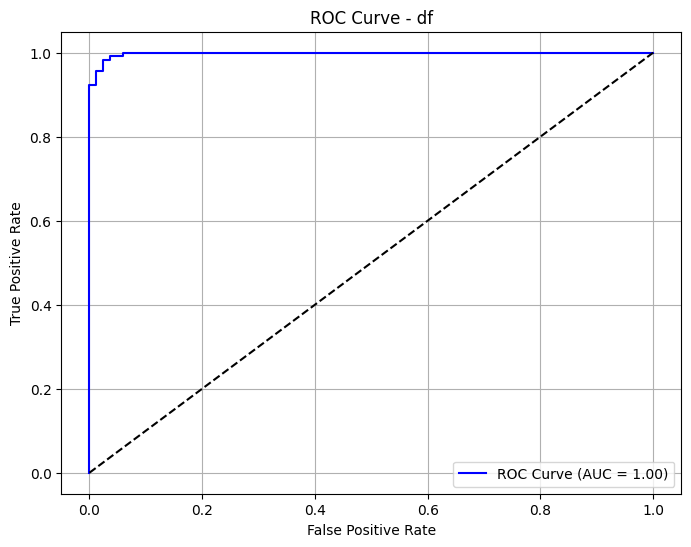

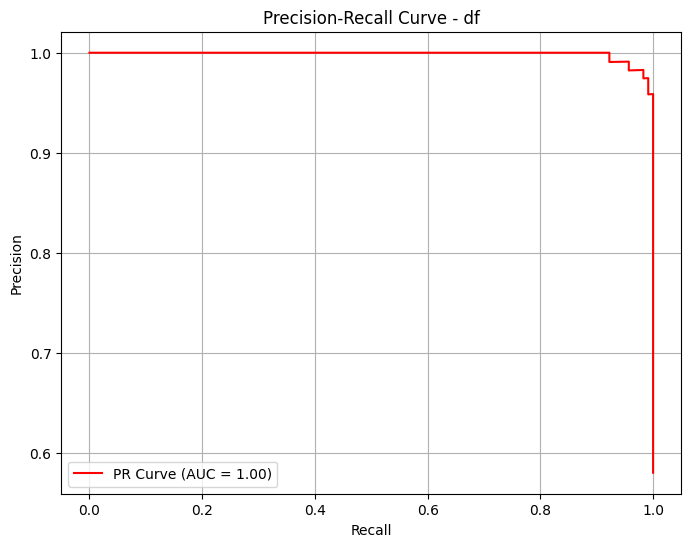

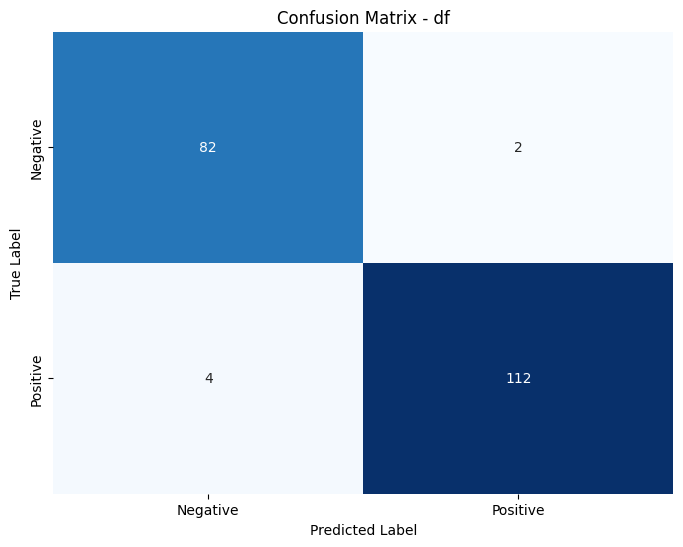


Results for df1:
Accuracy: 0.9700
Precision: 0.9825
Recall: 0.9655
F1 Score: 0.9739
ROC AUC Score: 0.9982
PR AUC Score: 0.9987
Cross-validation accuracy: 0.9690 ± 0.0086

Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.98      0.96        84
         1.0       0.98      0.97      0.97       116

    accuracy                           0.97       200
   macro avg       0.97      0.97      0.97       200
weighted avg       0.97      0.97      0.97       200


Confusion Matrix:
[[ 82   2]
 [  4 112]]


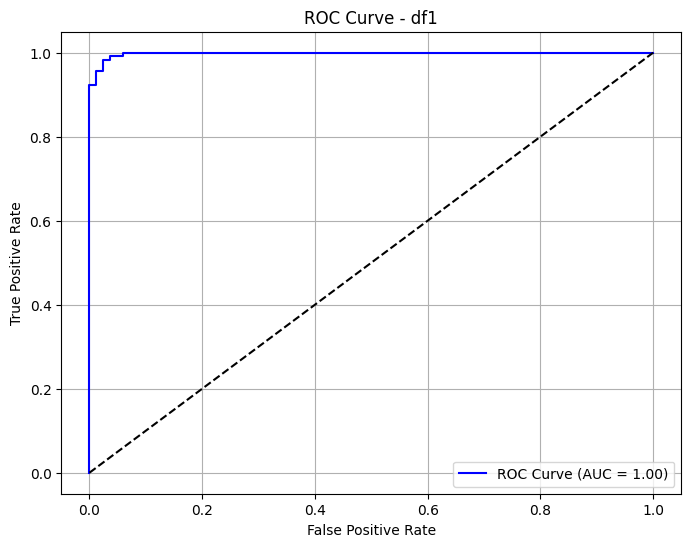

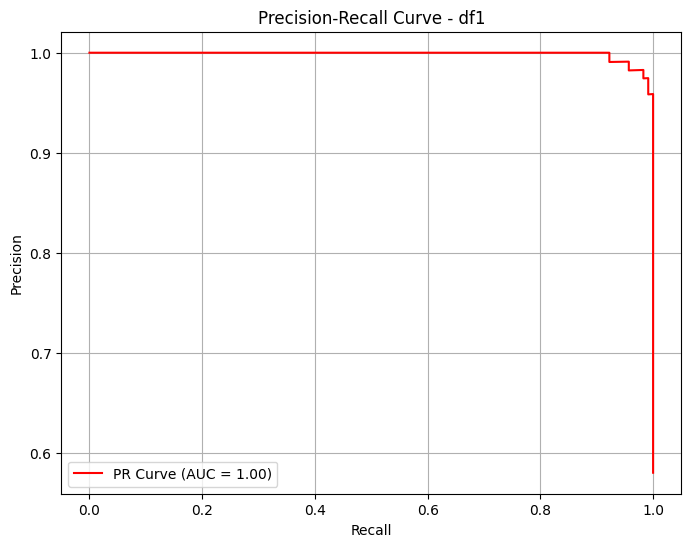

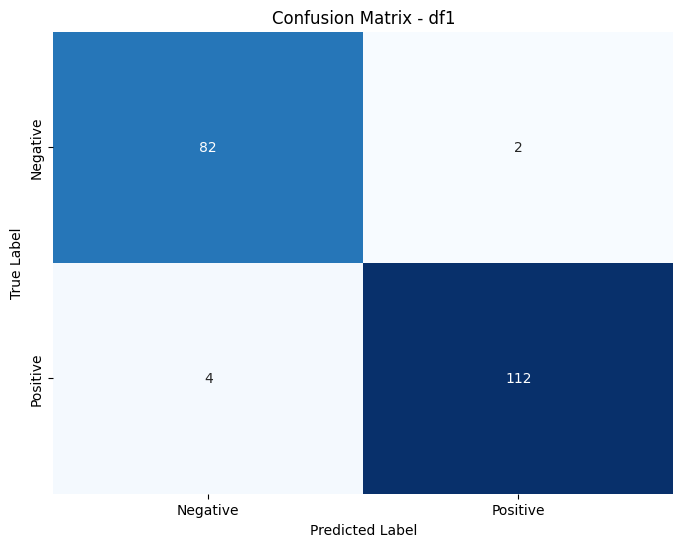

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,
    roc_curve, auc, classification_report, precision_recall_curve, roc_auc_score
)

def logistic_regression(X, y, dataset_label):
    # Stratified split to maintain class balance
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # Standardizing the dataset
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    X_scaled = scaler.transform(X)  # Scale for cross-validation

    # Train Logistic Regression with increased iterations and balanced class weight
    logreg = LogisticRegression(random_state=42, max_iter=10000, solver='saga', class_weight='balanced', n_jobs=-1)
    logreg.fit(X_train, y_train)

    # Get predictions
    y_pred = logreg.predict(X_test)
    y_score_logreg = logreg.predict_proba(X_test)[:, 1]

    # Compute metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_score_logreg)
    precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_score_logreg)
    pr_auc = auc(recall_vals, precision_vals)

    # Cross-validation
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    cv_scores = cross_val_score(logreg, X_scaled, y, cv=cv, scoring='accuracy')

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Print results
    print(f"\n{'='*50}\nResults for {dataset_label}:\n{'='*50}")
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')
    print(f'ROC AUC Score: {roc_auc:.4f}')
    print(f'PR AUC Score: {pr_auc:.4f}')
    print(f'Cross-validation accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}')
    print(f"\nClassification Report:\n{classification_report(y_test, y_pred)}")
    print(f"\nConfusion Matrix:\n{cm}\n{'='*50}")

    # Plot ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_score_logreg)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='blue')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {dataset_label}')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot Precision-Recall Curve
    plt.figure(figsize=(8, 6))
    plt.plot(recall_vals, precision_vals, label=f'PR Curve (AUC = {pr_auc:.2f})', color='red')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve - {dataset_label}')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Negative', 'Positive'],
                yticklabels=['Negative', 'Positive'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix - {dataset_label}')
    plt.show()

# Example usage
datasets = {
    'df': (df, 'target'),
    'df1': (df1, 'target')
}

for label, (df, target) in datasets.items():
    X = df.drop(columns=[target])
    y = df[target]
    logistic_regression(X, y, label)


# Decision Tree

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import auc, accuracy_score, classification_report, confusion_matrix, precision_recall_curve, make_scorer, average_precision_score
import matplotlib.pyplot as plt
import seaborn as sns
from six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt

Optimal parameters: {'criterion': 'entropy', 'max_depth': 6}
Classification Report for df: 
              precision    recall  f1-score   support

         0.0       0.93      0.94      0.93        83
         1.0       0.96      0.95      0.95       117

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.95      0.94      0.95       200

PR AUC: 0.9764058764592152
Accuracy for df: 0.94


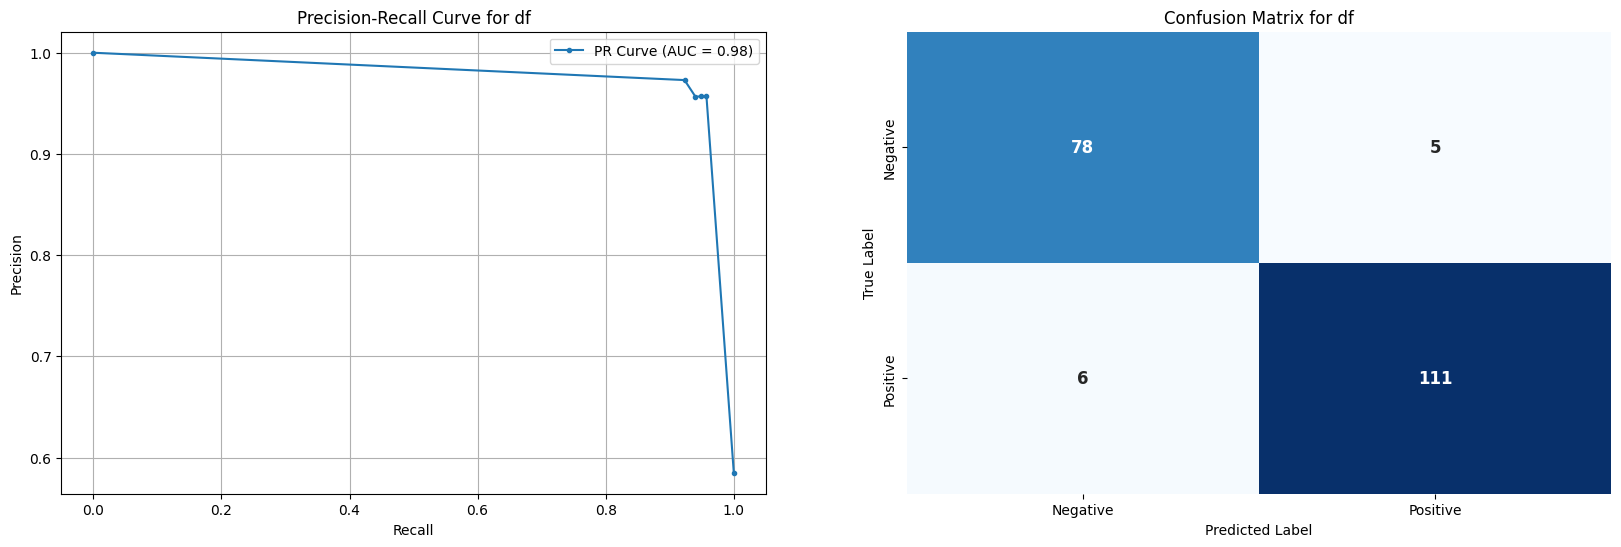

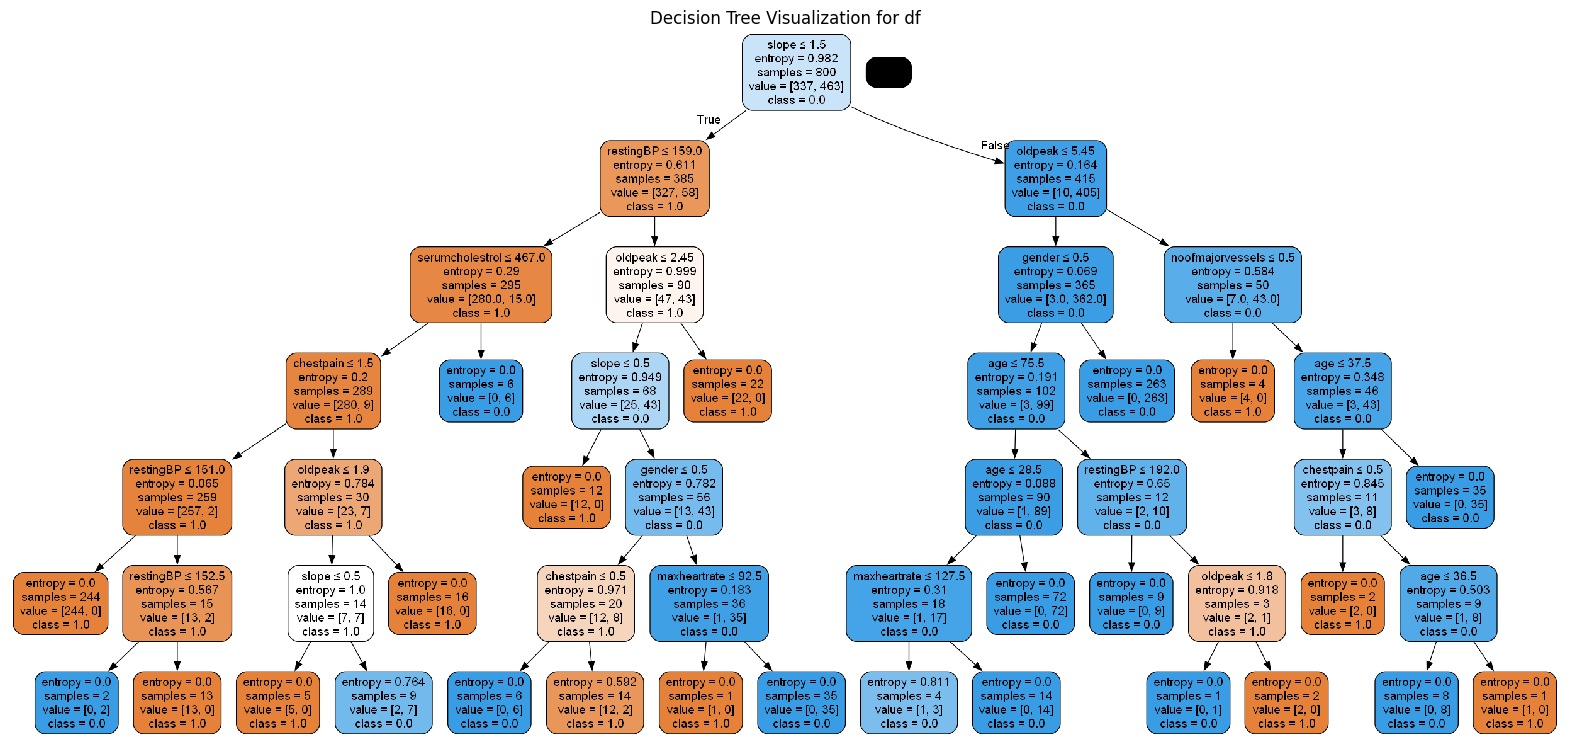

Optimal parameters: {'criterion': 'entropy', 'max_depth': 6}
Classification Report for df1: 
              precision    recall  f1-score   support

         0.0       0.93      0.94      0.93        83
         1.0       0.96      0.95      0.95       117

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.95      0.94      0.95       200

PR AUC: 0.9764058764592152
Accuracy for df1: 0.94


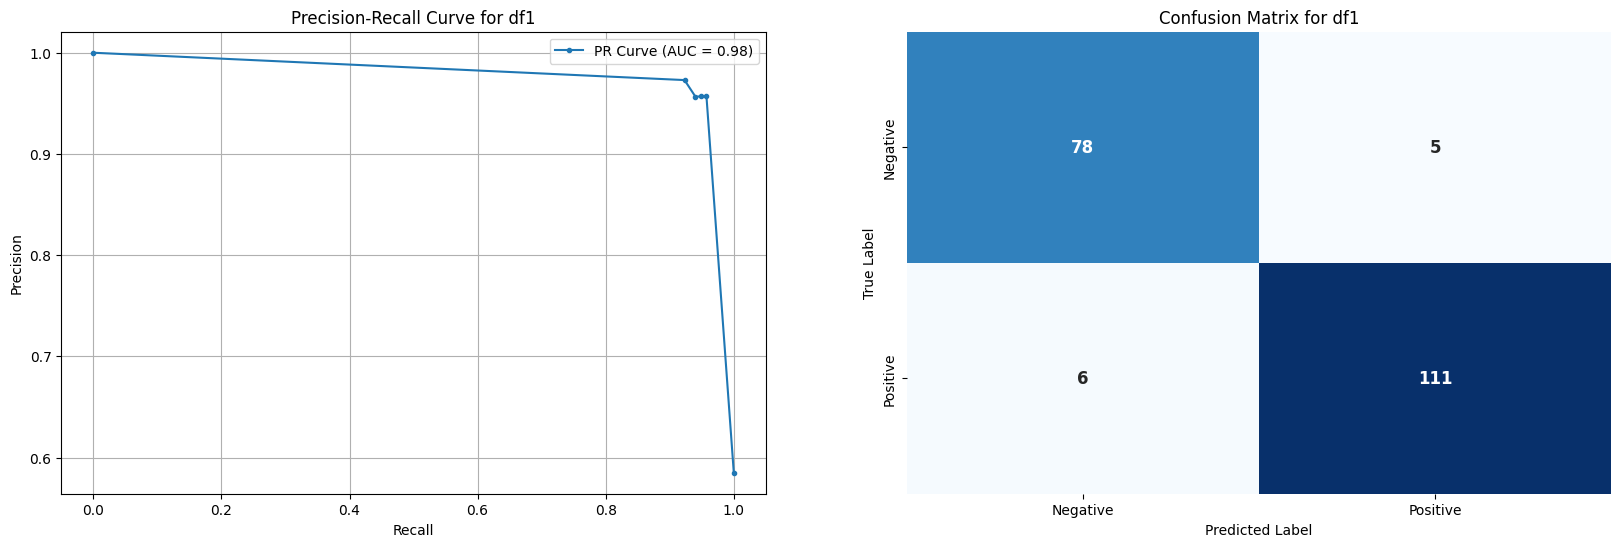

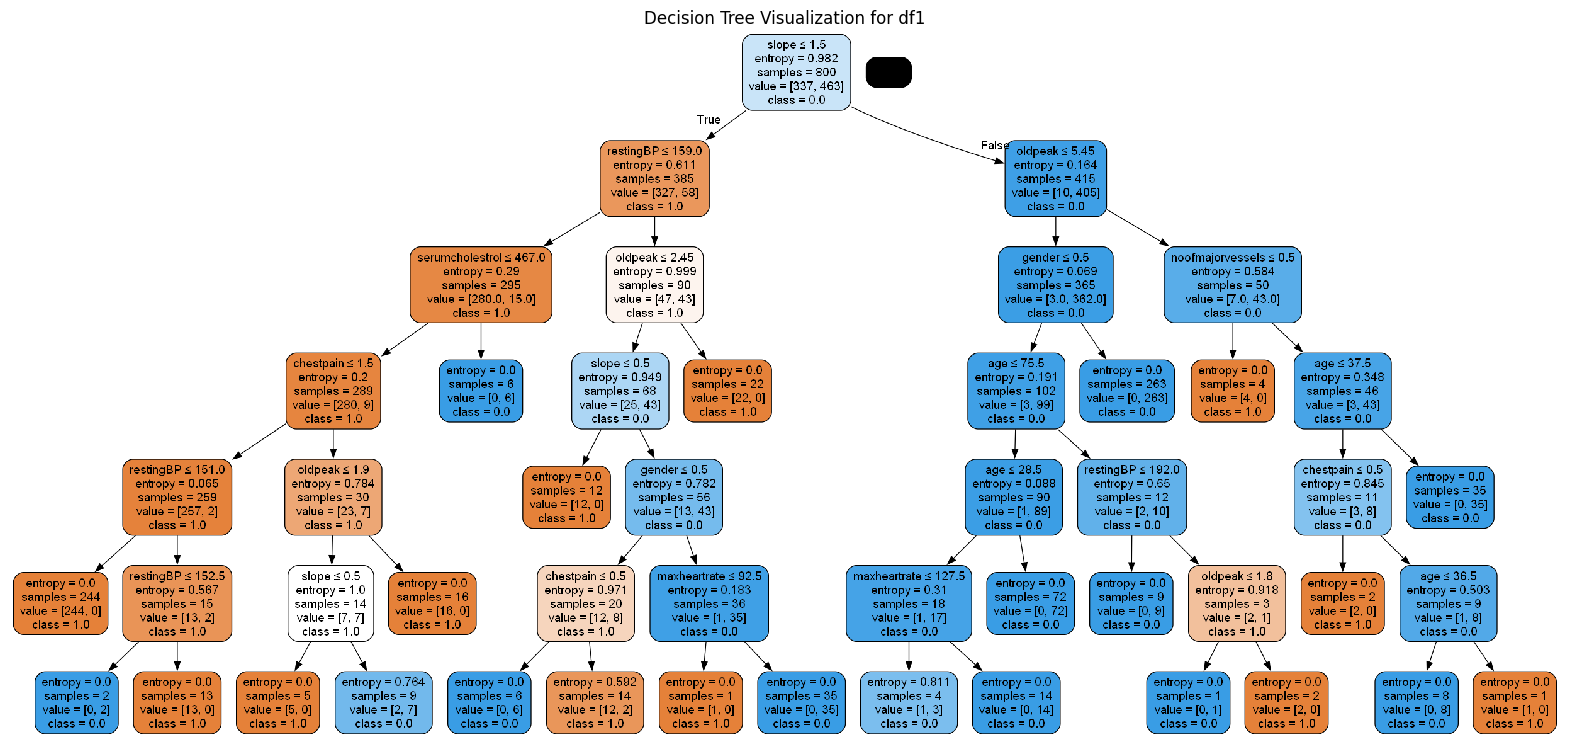

In [37]:
def evaluate_decision_tree(X, y, dataset_label):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Define the hyperparameter grid for  GridSearchCV
    param_grid = {'max_depth': range(3, 11),
                  'criterion': ['gini', 'entropy'] }

    # Initialize GridSearchCV with cross-validation and avg. precison score as the scoring metric
    grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, scoring=make_scorer(average_precision_score), cv=5)
    grid_search.fit(X_train, y_train)

    # Get the best hyperparameters and the best model
    best_params = grid_search.best_params_
    print(f'Optimal parameters: {best_params}')
    best_decisiontree = grid_search.best_estimator_

    # Get the predicted probabilities for the positive class
    y_scores = best_decisiontree.predict_proba(X_test)[:, 1]
    y_pred = best_decisiontree.predict(X_test)

    # Generate confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Generate classification report
    class_report = classification_report(y_test, y_pred)
    print(f'Classification Report for {dataset_label}: \n{class_report}')

    # Calculate precision and recall values
    precision, recall, thresholds_pr = precision_recall_curve(y_test, y_scores)

    # Calculate the area under the PR curve
    pr_auc = auc(recall, precision)
    print(f'PR AUC: {pr_auc}')

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy for {dataset_label}: {accuracy:.2f}')

    # Create subplots for the PR curve and confusion matrix
    fig, ax = plt.subplots(1, 2, figsize=(20, 6))
    
    # Plot the PR curve
    ax[0].plot(recall, precision, marker='.', label=f'PR Curve (AUC = {pr_auc:.2f})')
    ax[0].set_xlabel('Recall')
    ax[0].set_ylabel('Precision')
    ax[0].set_title(f'Precision-Recall Curve for {dataset_label}')
    ax[0].legend()
    ax[0].grid(True)

    # Plot confusion matrix
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"fontsize": 12, "fontweight": "bold", "ha": "center", "va": "center"}, ax=ax[1])
    ax[1].set_title(f'Confusion Matrix for {dataset_label}')
    ax[1].set_xlabel('Predicted Label')
    ax[1].set_ylabel('True Label')
    ax[1].set_xticks([0.5, 1.5])
    ax[1].set_xticklabels(['Negative', 'Positive'])
    ax[1].set_yticks([0.5, 1.5])
    ax[1].set_yticklabels(['Negative', 'Positive'])

    plt.show()

    # Visualize the Decision Tree
    dot_data = StringIO()
    filename = f"{dataset_label}_tree.png"
    feature_names = X.columns
    target_names = y.unique().astype(str)

    export_graphviz(best_decisiontree, out_file=dot_data, 
                    feature_names=feature_names, 
                    class_names=target_names,
                    filled=True, rounded=True, 
                    special_characters=True)
    
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    graph.write_png(filename)
    
    img = mpimg.imread(filename)
    plt.figure(figsize=(20, 20))
    plt.imshow(img, interpolation='nearest')
    plt.title(f'Decision Tree Visualization for {dataset_label}')
    plt.axis('off')
    plt.show()
    

# Dataset labels and data
datasets = {
    'df': (df, 'target'),
    'df1': (df1, 'target')
}

for label, (df, target) in datasets.items():
    X = df.drop(columns=[target])
    y = df[target]
    evaluate_decision_tree(X, y, label)


# Random Forest

In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve, auc, accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

Classification Report for df: 
              precision    recall  f1-score   support

         0.0       0.95      0.98      0.96        83
         1.0       0.98      0.97      0.97       117

    accuracy                           0.97       200
   macro avg       0.97      0.97      0.97       200
weighted avg       0.97      0.97      0.97       200

PR AUC: 0.9985812918408385
Accuracy for df: 0.97


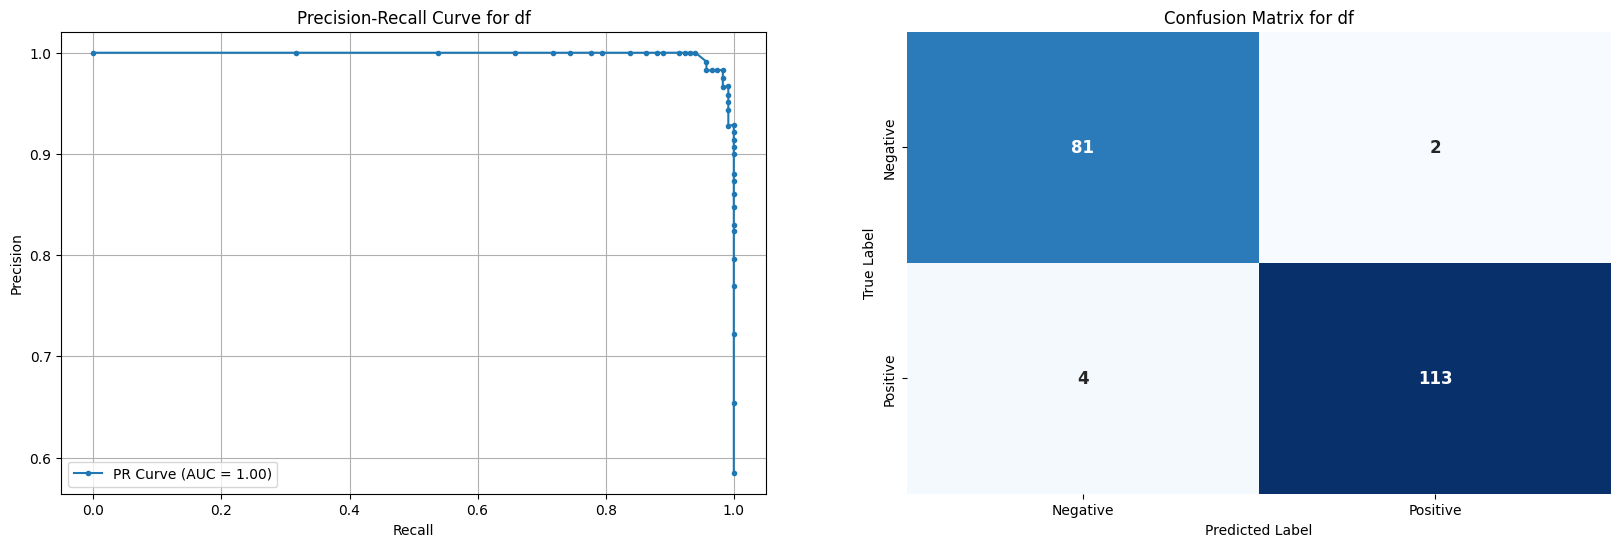

Classification Report for df1: 
              precision    recall  f1-score   support

         0.0       0.95      0.98      0.96        83
         1.0       0.98      0.97      0.97       117

    accuracy                           0.97       200
   macro avg       0.97      0.97      0.97       200
weighted avg       0.97      0.97      0.97       200

PR AUC: 0.9985812918408385
Accuracy for df1: 0.97


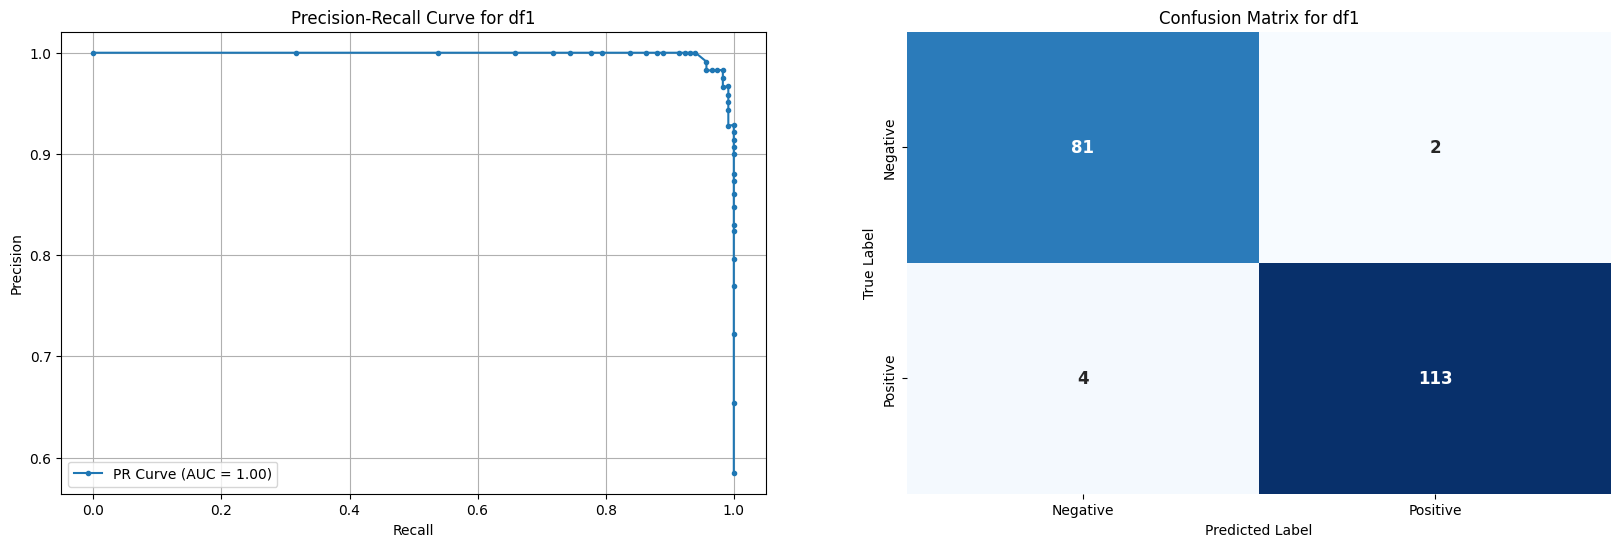

In [39]:
def evaluate_random_forest(X, y, dataset_label):
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize the RandomForest classifier
    random_forest = RandomForestClassifier(random_state=42)

    # Fit the classifier on the training data
    random_forest.fit(X_train, y_train)

    # Get the predicted probabilities for the positive class
    y_scores = random_forest.predict_proba(X_test)[:, 1]
    y_pred = random_forest.predict(X_test)

    # Generate classification report
    class_report = classification_report(y_test, y_pred)
    print(f'Classification Report for {dataset_label}: \n{class_report}')

    # Generate confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Calculate precision and recall values
    precision, recall, thresholds_pr = precision_recall_curve(y_test, y_scores)

    # Calculate the area under the PR curve
    pr_auc = auc(recall, precision)
    print(f'PR AUC: {pr_auc}')

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy for {dataset_label}: {accuracy:.2f}')

    # Create subplots for the PR curve and confusion matrix
    fig, ax = plt.subplots(1, 2, figsize=(20, 6))

    # Plot the PR curve
    ax[0].plot(recall, precision, marker='.', label=f'PR Curve (AUC = {pr_auc:.2f})')
    ax[0].set_xlabel('Recall')
    ax[0].set_ylabel('Precision')
    ax[0].set_title(f'Precision-Recall Curve for {dataset_label}')
    ax[0].legend()
    ax[0].grid(True)

    # Plot confusion matrix
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"fontsize": 12, "fontweight": "bold", "ha": "center", "va": "center"}, ax=ax[1])
    ax[1].set_title(f'Confusion Matrix for {dataset_label}')
    ax[1].set_xlabel('Predicted Label')
    ax[1].set_ylabel('True Label')
    ax[1].set_xticks([0.5, 1.5])
    ax[1].set_xticklabels(['Negative', 'Positive'])
    ax[1].set_yticks([0.5, 1.5])
    ax[1].set_yticklabels(['Negative', 'Positive'])

    plt.show()



# Dataset labels and data (assuming df, df1 are defined as before)
datasets = {
    'df': (df, 'target'),
    'df1': (df1, 'target')
}

for label, (df, target) in datasets.items():
    X = df.drop(columns=[target])
    y = df[target]
    evaluate_random_forest(X, y, label)


# SVM

In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_curve, auc, accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns


Best parameters found for df: {'kernel': 'rbf'}
Classification Report for df: 
              precision    recall  f1-score   support

         0.0       0.95      0.96      0.96        83
         1.0       0.97      0.97      0.97       117

    accuracy                           0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.97      0.96      0.97       200

PR AUC: 0.9967262769515364
Accuracy for df: 0.96


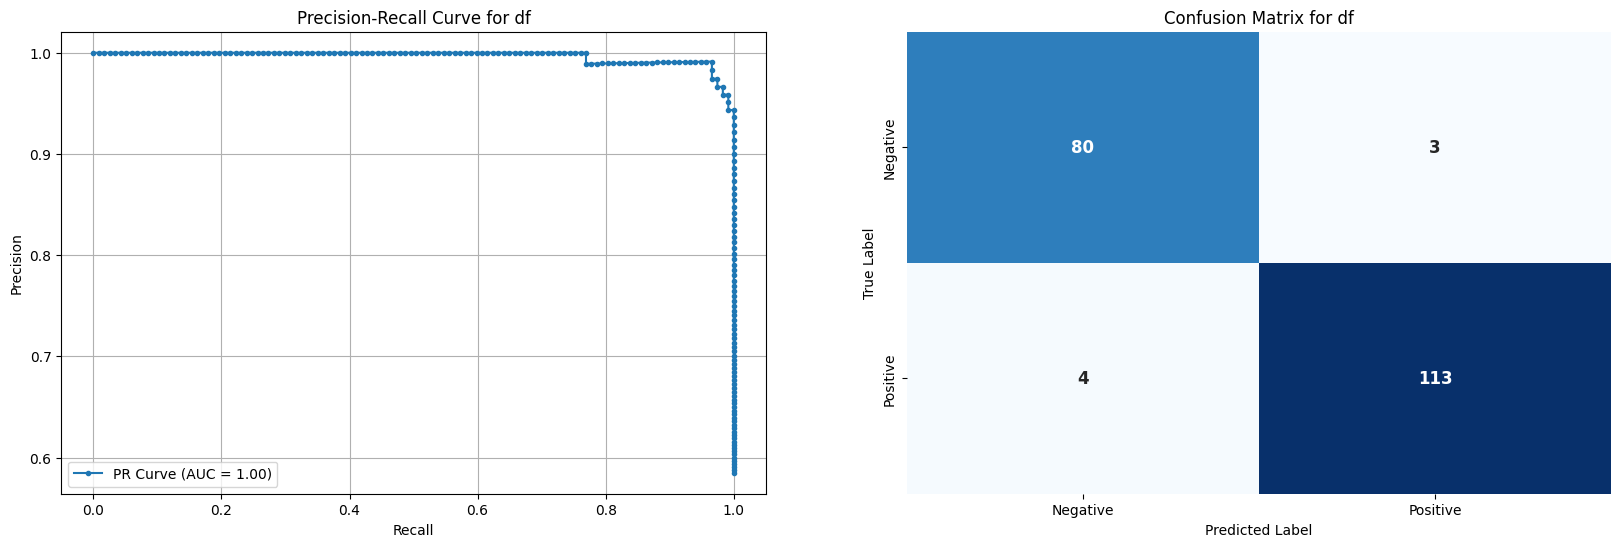

Best parameters found for df1: {'kernel': 'rbf'}
Classification Report for df1: 
              precision    recall  f1-score   support

         0.0       0.95      0.96      0.96        83
         1.0       0.97      0.97      0.97       117

    accuracy                           0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.97      0.96      0.97       200

PR AUC: 0.9967262769515364
Accuracy for df1: 0.96


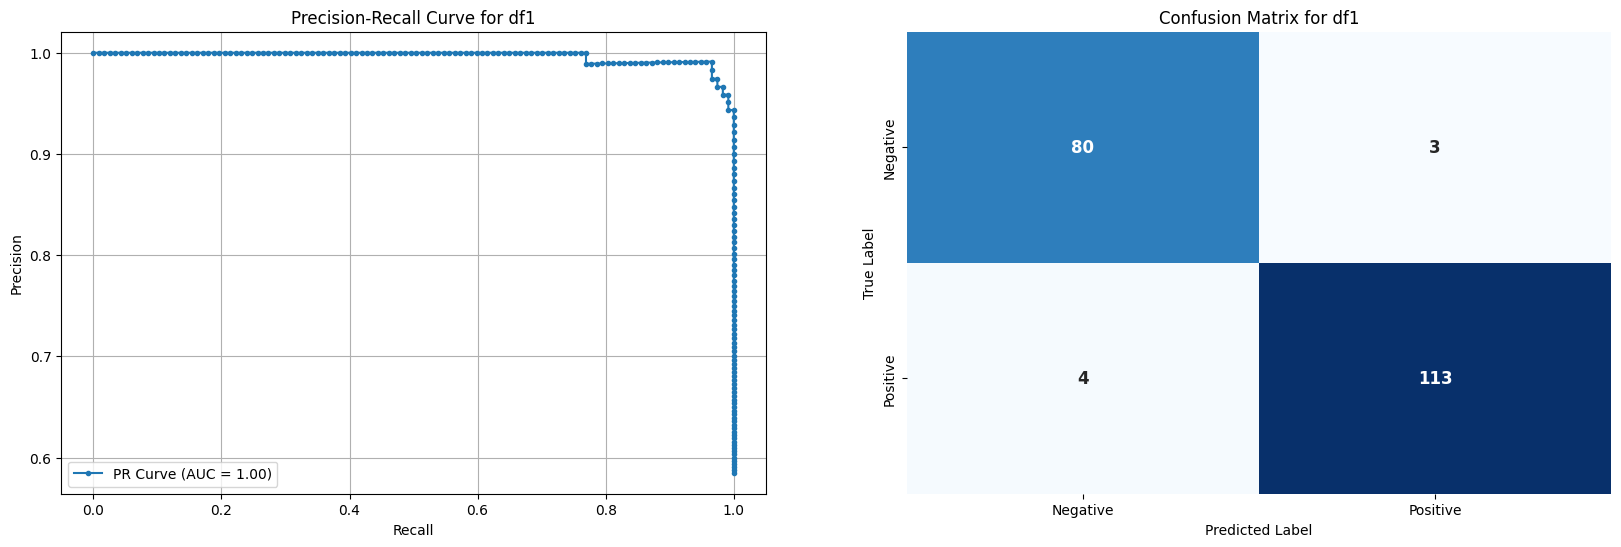

In [41]:

def evaluate_svm(X, y, dataset_label):
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize the StandardScaler and scale the training data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)

    # Scale the test data using the same scaler
    X_test_scaled = scaler.transform(X_test)

    # Initialize the SVM classifier
    svm_clf = SVC(C = 1.0, probability=True)

    # Define the parameter grid for GridSearchCV
    param_grid = {
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
    }

    # Perform Grid Search to find the best parameters
    grid_search = GridSearchCV(estimator=svm_clf, param_grid=param_grid, cv=5)
    grid_search.fit(X_train_scaled, y_train)

    # Get the best parameters found by Grid Search
    best_params = grid_search.best_params_
    print(f'Best parameters found for {dataset_label}: {best_params}')

    # Use best parameters to train SVM
    best_svm_clf = SVC(**best_params, probability=True)
    best_svm_clf.fit(X_train_scaled, y_train)

    # Fit the classifier on the scaled training data
    best_svm_clf.fit(X_train_scaled, y_train)

    # Get the predicted probabilities for the positive class
    y_scores = best_svm_clf.predict_proba(X_test_scaled)[:, 1]
    y_pred = best_svm_clf.predict(X_test_scaled)

    # Generate classification report
    class_report = classification_report(y_test, y_pred)
    print(f'Classification Report for {dataset_label}: \n{class_report}')

    # Generate confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Calculate precision and recall values
    precision, recall, thresholds_pr = precision_recall_curve(y_test, y_scores)

    # Calculate the area under the PR curve
    pr_auc = auc(recall, precision)
    print(f'PR AUC: {pr_auc}')

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy for {dataset_label}: {accuracy:.2f}')

    # Create subplots for the PR curve and confusion matrix
    fig, ax = plt.subplots(1, 2, figsize=(20, 6))

    # Plot the PR curve
    ax[0].plot(recall, precision, marker='.', label=f'PR Curve (AUC = {pr_auc:.2f})')
    ax[0].set_xlabel('Recall')
    ax[0].set_ylabel('Precision')
    ax[0].set_title(f'Precision-Recall Curve for {dataset_label}')
    ax[0].legend()
    ax[0].grid(True)

    # Plot confusion matrix
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"fontsize": 12, "fontweight": "bold", "ha": "center", "va": "center"}, ax=ax[1])
    ax[1].set_title(f'Confusion Matrix for {dataset_label}')
    ax[1].set_xlabel('Predicted Label')
    ax[1].set_ylabel('True Label')
    ax[1].set_xticks([0.5, 1.5])
    ax[1].set_xticklabels(['Negative', 'Positive'])
    ax[1].set_yticks([0.5, 1.5])
    ax[1].set_yticklabels(['Negative', 'Positive'])

    plt.show()


    
# Dataset labels and data
datasets = {
    'df': (df, 'target'),
    'df1': (df1, 'target')
}
# Iterate through each dataset, perform svm classification scaling, plot PR curve, ROC curve, and print metrics
for label, (df, target) in datasets.items():
    X = df.drop(columns=[target])
    y = df[target]
    evaluate_svm(X, y, label)
